In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount ('/content/drive')
%cd'/content/drive/MyDrive/'
df = pd.read_csv('athlete_events.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Aprèn a realitzar test d'hipòtesis amb Python.
# Nivell 1
## Exercici 1
**Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.**

En aquest DataFrame podem veure que, com que un mateix atleta es pot presentar a més d'una modalitat, aquest pot aparèixer més d'una vegada, i com que en aquest samplejat voldrem mirar quines son les característiques físiques mitjanes dels atletes, eliminarem tots els atletes repetits per tal d'evitar informació duplicada.
Evidentment també descartarem la variable 'Event' ja que deixaría de tenir sentit si ens quedem només amb una modalitat de cada atleta.
També descartarem les variables 'NOC' i 'Games' perquè repeteixen informació d'altres variables.

Les variables amb les que ens quedarem seràn les següents:

* ID: identificador únic de cada atleta
* Name: nom de l'atleta
* Sex: gènere de l'atleta
* Age: edat de l'atleta
* Height: altura de l'atleta (cm)
* Weight: pes de l'atleta (Kg)
* Team: país que representa l'atleta
* Year: any en el que va participar
* Season: estació de l'any en la que va participar
* City: ciutat en la que es van celebrar els jocs
* Sport: esport que practica l'atleta
* Medal: medalla que ha guanyat l'atleta

In [ ]:
df = df.drop_duplicates(subset='ID', keep='first')

In [ ]:
df = df.drop(columns=['Event','NOC', 'Games'])

Veiem que hi ha una considerable quantitat d'atletes dels quals no sabem l'edat, l'altura ni el pes, així que per desgràcia ens hem de desfer d'aquests atletes ja que precisament són les variables que ens interessen.

In [ ]:
df = df.dropna(subset=['Height', 'Weight', 'Age'])
df

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,1992,Winter,Albertville,Cross Country Skiing,NaN
18,7,John Aalberg,M,31.0,183.0,72.0,United States,1992,Winter,Albertville,Cross Country Skiing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,2000,Summer,Sydney,Rowing,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,2016,Summer,Rio de Janeiro,Basketball,NaN
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,1976,Winter,Innsbruck,Luge,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014,Winter,Sochi,Ski Jumping,NaN


Volem tesetejar si l'altura mitjana dels atletes de bàsquet és superior a la mitjana de la resta de jugadors.

Declarem la nostra hipòtesis:
* H0: L'altura mitja dels jugadors de bàsquet és igual a la altura mitjana dels jugadors de la resta d'esports.
* H1: L'altura mitja dels jugadors de bàsquet no és igual a la altura mitjana dels jugadors de la resta d'esports.

Creem dos subgrup de tots els jugadors de bàsquet i un altre de tots els jugadors que no juguen a bàsquet. Agafem 1000 mostres de cada una.

In [ ]:
# Bàsquet
dfBasquet = df[df['Sport'] == 'Basketball'].sample(1000)

In [ ]:
# Resta d'atletes
dfRest = df[df['Sport'] != 'Basketball'].sample(1000)

(1000, 12)

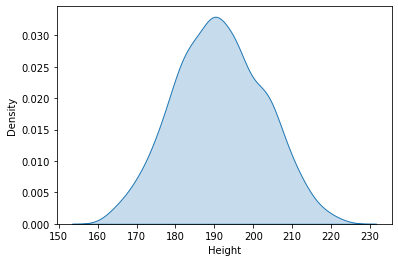

In [ ]:
sns.kdeplot(dfBasquet['Height'], fill = True)

Veiem en la gràfica de adalt que els jugadors de bàsquet tenen una distibució normal, per tant escollirem un test d'hipòtesis paramètric.

In [ ]:
# Utilitzem el t-test de student
from scipy.stats import ttest_ind
stat, p = ttest_ind(dfBasquet['Height'], dfRest['Height'])
print('p-value= %.3f' % p)
if p > 0.05:
	print('Probablement tenen la mateixa distribució')
else:
	print('Probablement tenen diferent distribució')

p-value= 0.000
Probablement tenen diferent distribució


Grafiquem les dues gràfiques a veiem si te sentit amb el test d'hipòtesis anterior.

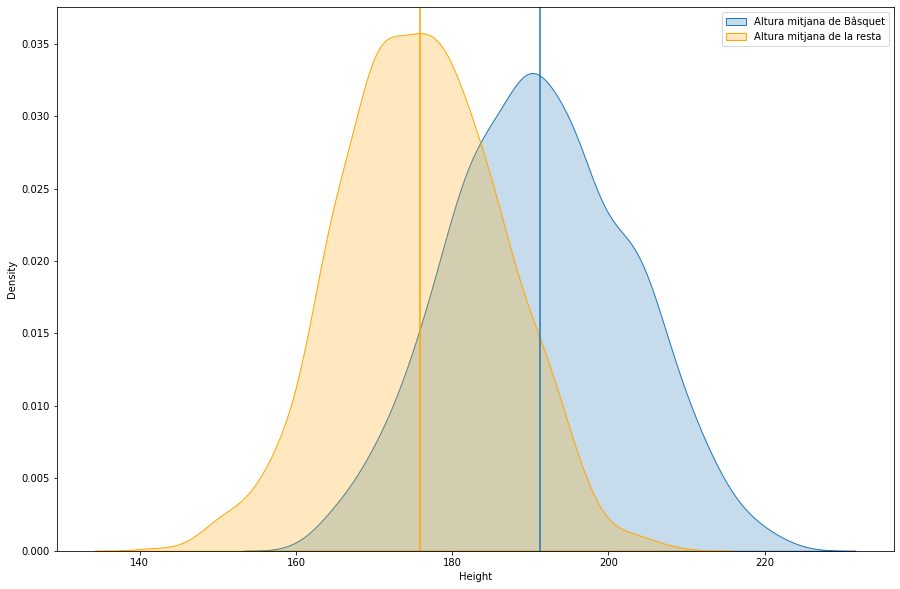

In [ ]:
plt.figure(figsize=(15,10))
sns.kdeplot(dfBasquet['Height'], label='Altura mitjana de Bâsquet',fill = True)
sns.kdeplot(dfRest['Height'], label='Altura mitjana de la resta',fill = True, color='orange')
plt.axvline(x=dfBasquet['Height'].mean())
plt.axvline(x=dfRest['Height'].mean(), color='orange')
plt.legend()
plt.show()

Veiem que efectivament no tenen una mitjana semblant i, per tant, no tenen una distribució similar.

# Nivell 2
## Exercici 2
**Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.**

En aquest cas el nostre test d'hipòtesis consistirà en veure si existeix una correlació entre la altura i l'edat dels atletes.

* H0: La altura i l'edat no estàn correlacionades
* H1: La altura i l'edat estàn correlacionades

In [ ]:
dfsample = df.sample(500)

In [ ]:
#En aquest cas utilitzarem el test de Pearson
from scipy.stats import pearsonr
stat, p = pearsonr(dfsample['Age'], dfsample['Height'])
print('stat=%.3f, p-value= %.3f' % (stat, p))
if p > 0.05:
	print('Probablement independent')
else:
	print('Probablement dependent')

stat=0.054, p-value= 0.227
Probablement independent


Com que p-value > 0.05, ens quedem amb l'hipòtesis nula i per tant diem que és probable que l'edat i l'altura siguin dues variables independents.

Si ho comparem amb la correlació veiem que encaixa amb els resultats anteriors.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


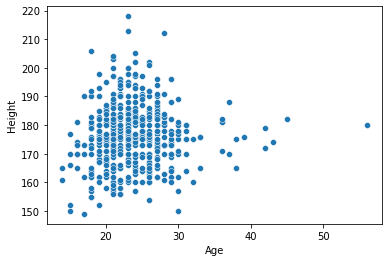

In [ ]:
sns.scatterplot(dfsample['Age'], dfsample['Height'])

Farem una altre test amb altres variables i amb un altre test d'hipòtesis de correlació. En quest cas ho farem amb la altura i el pes.

* H0: La altura i el pes no estàn correlacionades
* H1: La altura i el pes estàn correlacionades

In [ ]:
# En aquest cas utilitzarem el test de spearman
from scipy.stats import spearmanr
stat, p = spearmanr(dfsample['Height'], dfsample['Weight'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Independent')
else:
	print('Dependent')

stat=0.810, p=0.000
Dependent


Com que p-value < 0.05, ens quedem amb l'hipòtesis alternativa i per tant diem que és probable que l'edat i l'altura siguin dues variables dependents.

Si ho comparem amb la correlació veiem que també encaixa amb els resultats anteriors.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


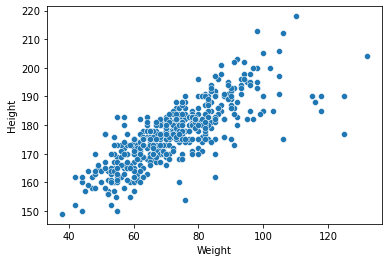

In [ ]:
sns.scatterplot(dfsample['Weight'], dfsample['Height'])

# Nivell 3
## Exercici 3
**Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.**

In [ ]:
df['Medal'].unique()

array([nan, 'Bronze', 'Silver', 'Gold'], dtype=object)

Per fer aquest exercici, mirarem si la mitjana de l'edat dels atletes que guanyen or, plata o bronze és la mateixa.

* H0: La mitjana d'edat de les tres medalles és la mateixa.
* H1: Com a mínim una de les tres medalles te una mitjana diferent a la resta

In [ ]:
#Df's d les tres medalles 
dfOr = df[df['Medal'] == 'Gold'].sample(1000)
dfPlata = df[df['Medal'] == 'Silver'].sample(1000)
dfBronze = df[df['Medal'] == 'Bronze'].sample(1000)

In [ ]:
from scipy.stats import f_oneway
stat, p = f_oneway(dfOr['Age'], dfPlata['Age'], dfBronze['Age'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablement tenen la mateixa distribució')
else:
	print('Probablement no tenen la mateixa distribució')

stat=0.983, p=0.374
Probablement tenen la mateixa distribució


Com que p-value > 0.05, agafem l'hiòtesis nula i diem que és probable que tinguin la mateixa distribució.

A continuació grafiquem els tres grups i ho contrastem amb els resultats obtinguts. 

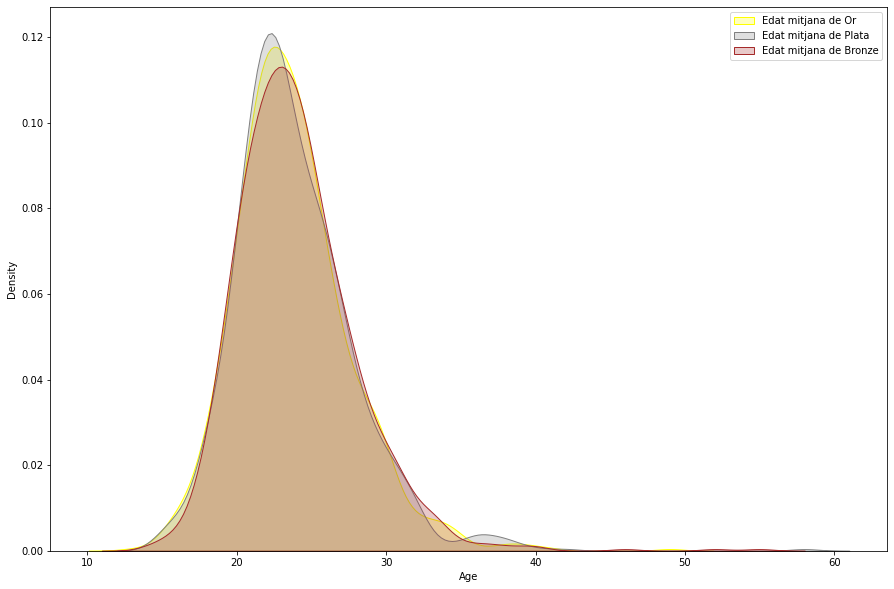

In [ ]:
plt.figure(figsize=(15,10))
sns.kdeplot(dfOr['Age'], label='Edat mitjana de Or',fill = True, color='Yellow')
sns.kdeplot(dfPlata['Age'], label='Edat mitjana de Plata',fill = True, color='Grey')
sns.kdeplot(dfBronze['Age'], label='Edat mitjana de Bronze',fill = True, color='Brown')
plt.legend()
plt.show()

Veiem que les tres mitjanes son molt semblants i per tant tenen un distribució similar.